## Different Reference Speech

In [2]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
FreeVC = TTS("voice_conversion_models/multilingual/vctk/freevc24").to(device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/coqpit/coqpit.py:864: UserWarning: Type mismatch in FreeVCConfig
Failed to deserialize field: test_sentences (list[str]) = [["It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."], ['Be a voice, not an echo.'], ["I'm sorry Dave. I'm afraid I can't do that."], ["This cake is great. It's so delicious and moist."], ['Prior to November 22, 1963.']]
Replaced it with field's default value: []
  self.deserialize(data)


In [3]:
# filepath variables
m1_fp = "good_outputs/M-1/AlanKay_2007-344.67-355.02-<o,f0,male>.wav"
m2_fp = "good_outputs/M-2/AdamSavage_2008P-641.94-652.45-<o,f0,male>.wav"
f1_fp = "good_outputs/F-1/BarbaraBlock_2010Z-1035.88-1046.06-<o,f0,female>.wav"
f2_fp = "good_outputs/F-2/AimeeMullins_1998-186.79-197.43-<o,f0,female>.wav"
obama_ref = "good_outputs/Obama/obama_output_fishspeech.wav"
trump_ref = "good_outputs/Trump/trump_output_fishspeech.wav"

### Obama

In [4]:
FreeVC.voice_conversion_to_file(
        source_wav=obama_ref,
        target_wav=m1_fp,
        file_path="good_outputs/Obama/obama_to_m1.wav"
)

'good_outputs/Obama/obama_to_m1.wav'

In [5]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Obama/obama_to_m2.wav"
)

'good_outputs/Obama/obama_to_m2.wav'

In [6]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=f1_fp,
    file_path="good_outputs/Obama/obama_to_f1.wav"
)

'good_outputs/Obama/obama_to_f1.wav'

In [7]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=f2_fp,
    file_path="good_outputs/Obama/obama_to_f2.wav"
)

'good_outputs/Obama/obama_to_f2.wav'

### Trump

In [8]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=m1_fp,
    file_path="good_outputs/Trump/trump_to_m1.wav"
)

'good_outputs/Trump/trump_to_m1.wav'

In [4]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Trump/trump_to_m2.wav"
)

'good_outputs/Trump/trump_to_m2.wav'

In [5]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=f1_fp,
    file_path="good_outputs/Trump/trump_to_f1.wav"
)

'good_outputs/Trump/trump_to_f1.wav'

In [6]:
FreeVC.voice_conversion_to_file(
    source_wav=trump_ref,
    target_wav=f2_fp,
    file_path="good_outputs/Trump/trump_to_f2.wav"
)

'good_outputs/Trump/trump_to_f2.wav'

## Same Reference Speech

In [7]:
m2_fp = "good_outputs/M-2/Adam_Savage_M2.mp3"

### Obama

In [9]:
FreeVC.voice_conversion_to_file(
    source_wav=obama_ref,
    target_wav=m2_fp,
    file_path="good_outputs/Obama/obama_to_m2_same.wav"
)

'good_outputs/Obama/obama_to_m2_same.wav'

## Prosody Analysis

In [18]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
def estimate_frequencies(filepath, title):
    y, sr = librosa.load(filepath)
    f0s = librosa.yin(y, sr=sr, fmin=60, fmax=280)
    fig, ax = plt.subplots()
    ax.plot(f0s, ".")
    ax.set_title(title)
    ax.set_ylabel("Fundamental Frequency (F0)")
    ax.set_xlabel("Frame")
    ax.set_ylim((90, 200))
    return f0s

In [24]:
def print_statistics(f0s):
    mean = np.mean(f0s)
    std = np.std(f0s)
    cv = std/mean
    range = np.max(f0s)-np.min(f0s)
    print("Mean:", mean)   
    print("Standard Deviation:", std)
    print("Coefficient of Variation (CV):", cv)
    print("Range:", range)

## Obama

Mean: 161.33090068216646
Standard Deviation: 37.267635654700186
Coefficient of Variation (CV): 0.2310012247940035
Range: 222.58173388160026


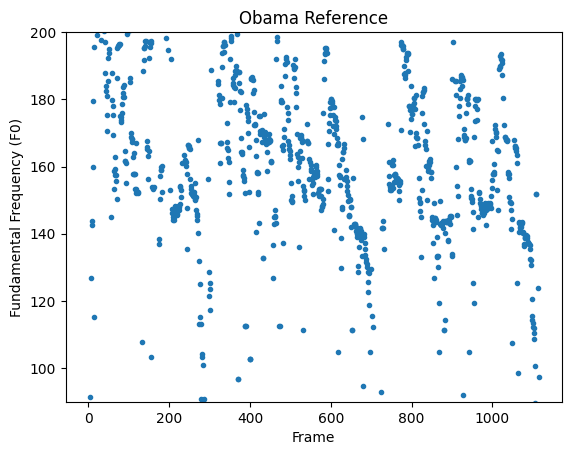

In [25]:
obama_bf_f0s = estimate_frequencies("good_outputs/Obama/obama_output_fishspeech.wav", "Obama Reference")
print_statistics(obama_bf_f0s)

Mean: 211.93222380829852
Standard Deviation: 48.799773858979606
Coefficient of Variation (CV): 0.23026122683033337
Range: 222.77382943143812


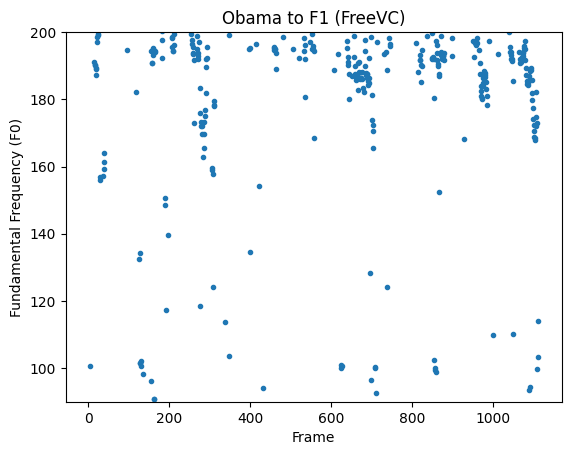

In [27]:
obama_to_f1_f0s = estimate_frequencies("good_outputs/Obama/FreeVC/obama_to_f1.wav", "Obama to F1 (FreeVC)")
print_statistics(obama_to_f1_f0s)

Mean: 209.84771287533928
Standard Deviation: 55.74154274389646
Coefficient of Variation (CV): 0.2656285454824561
Range: 222.77382943143812


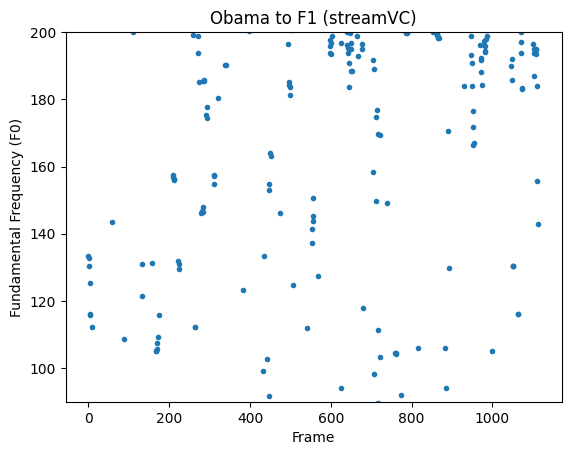

In [28]:
obama_to_f1_f0s = estimate_frequencies("good_outputs/Obama/streamVC/obama_to_f1.wav", "Obama to F1 (streamVC)")
print_statistics(obama_to_f1_f0s)